## Load Train and Test Images

In [1]:
import os
import numpy as np


print(os.getcwd())

train_img_dir = os.getcwd() + '/Capstone data/train/'
test_img_dir = os.getcwd() + '/Capstone data/test/'

#spectrogram of current 
train_img_names_c = [x for x in os.listdir(train_img_dir) if x.endswith('_c.png')]

#spectrogram of voltage
train_img_names_v = [x for x in os.listdir(train_img_dir) if x.endswith('_v.png')]

#spectrogram of current 
test_img_names_c = [x for x in os.listdir(test_img_dir) if x.endswith('_c.png')]

#spectrogram of voltage
test_img_names_v = [x for x in os.listdir(test_img_dir) if x.endswith('_v.png')]


print(len(train_img_names_c))
print(len(train_img_names_v))

print(len(test_img_names_c))
print(len(test_img_names_v))



C:\Users\A702628\OneDrive - Atos\Microsoft Capstone IA
988
988
659
659


In [2]:
from skimage import io
from skimage.color import rgb2gray
from skimage.viewer import ImageViewer
import matplotlib.pyplot as plt

from scipy import misc
import cv2




print(len(train_img_names_c))

all_train_images = np.ones((len(train_img_names_c), 128, 118)) #if as_grey=True
all_test_images = np.ones((len(test_img_names_c), 128, 118)) #if as_grey=True


i = 0
for im in train_img_names_c:

    # Load an color image in grayscale
    my_image = cv2.imread(train_img_dir + '/' + im,0)


    all_train_images[i] = my_image
    i = i + 1

    
i = 0
for im in test_img_names_c:
    #print(im)
    my_image = cv2.imread(test_img_dir + '/' + im,0)


    all_test_images[i] = my_image
    i = i + 1    


print("all_train_images.shape {0}".format(all_train_images.shape))
print("all_test_images.shape {0}".format(all_test_images.shape))


# look at the image
#plt.imshow(my_image)

C:\Users\A702628\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


988
all_train_images.shape (988, 128, 118)
all_test_images.shape (659, 128, 118)


[[ 30.  30.  30. ...  30.  30.  30.]
 [ 30.  30.  30. ...  30.  30.  30.]
 [ 30.  30.  30. ...  30.  30.  30.]
 ...
 [ 77.  73.  71. ... 194. 195. 200.]
 [ 78.  81.  82. ... 212. 212. 205.]
 [ 69.  63.  62. ... 179. 181. 185.]]


(-0.5, 117.5, 127.5, -0.5)

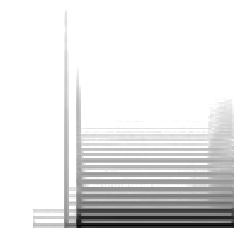

In [3]:
sample_number = 12
print(all_train_images[sample_number])
plt.imshow(all_train_images[sample_number], cmap="gray_r")
plt.axis('off')


## Reshape

In [4]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:

print("\n**************************")
n_samples = len(all_train_images)

print("all_train_images.shape {0}".format(all_train_images.shape))
data_train = all_train_images.reshape((n_samples, 15104)) #988, 15104, 4

print("data_train shape {0}".format(data_train.shape))
print(data_train[:10])

print("**************************\n")


print("\n**************************")
n_samples = len(all_test_images)

print("all_test_images.shape {0}".format(all_test_images.shape))
data_test = all_test_images.reshape((n_samples, 15104)) #988, 15104, 4

print("data_test shape {0}".format(data_test.shape))
print(data_test[:10])

print("**************************\n")





**************************
all_train_images.shape (988, 128, 118)
data_train shape (988, 15104)
[[ 38.  47.  51. ... 179. 184. 197.]
 [ 30.  30.  30. ... 177. 183. 196.]
 [ 62.  61.  64. ... 180. 187. 204.]
 ...
 [ 30.  30.  30. ... 180. 186. 200.]
 [ 67.  68.  66. ... 152. 159. 179.]
 [ 74.  61.  46. ... 153. 165. 159.]]
**************************


**************************
all_test_images.shape (659, 128, 118)
data_test shape (659, 15104)
[[ 84.  81.  77. ... 179. 179. 172.]
 [ 30.  30.  30. ... 180. 181. 180.]
 [ 30.  30.  30. ... 152. 153. 148.]
 ...
 [ 56.  61.  62. ... 180. 180. 174.]
 [ 30.  30.  30. ... 179. 188. 205.]
 [ 70.  71.  69. ... 152. 154. 162.]]
**************************



## Load Train labels

In [5]:
from numpy import genfromtxt


train_labels_dir = os.getcwd() + '/'

train_labels = genfromtxt(train_labels_dir + 'train_labels.csv', delimiter=',', skip_header=1)

print(len(train_labels))
print(train_labels.shape)



988
(988, 2)


In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_train, train_labels, test_size = 0.3, random_state = 54)

In [7]:
print(x_train.shape)
print(y_train.shape)

(691, 15104)
(691, 2)


In [8]:
train_labels

array([[1.000e+03, 8.000e+00],
       [1.001e+03, 1.000e+00],
       [1.002e+03, 8.000e+00],
       ...,
       [1.985e+03, 6.000e+00],
       [1.986e+03, 9.000e+00],
       [1.987e+03, 1.000e+01]])

## Saving for CNTK

In [9]:
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, data, hasLabels=True, labels=0):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    print("Saving", filename )
    with open(filename, 'w') as f:
        print("opened....")
        labels_ohe = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str))) #for one hot encoding
        index = 0
        for row in data:            
            row_str = row.astype(str)
            if hasLabels:                               
                label_str = labels_ohe[int(labels[index])]               
            
            feature_str = ' '.join(row_str)
            
            if hasLabels:
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
            else:
                f.write('|features {}\n'.format(feature_str))
            
            index = index + 1


## Saving Training/Test Data

In [10]:
train_labels_GT = train_labels[:,1] #Get Ground truth
#train_labels_GT = y_train[:,1] #Get Ground truth
#test_labels_GT = y_test[:,1]


print ('Writing train text file...')

data_dir = os.path.join(os.getcwd(), "data/Out")


savetxt(os.path.join(data_dir, "train.txt"), data_train, True, train_labels_GT)
#savetxt(os.path.join(data_dir, "train.txt"), x_train, True, train_labels_GT)
savetxt(os.path.join(data_dir, "test.txt"), data_test, False)
#savetxt(os.path.join(data_dir, "test.txt"), x_test, True, test_labels_GT)


print("Done")

Writing train text file...
Saving C:\Users\A702628\OneDrive - Atos\Microsoft Capstone IA\data/Out\train.txt
opened....
Saving C:\Users\A702628\OneDrive - Atos\Microsoft Capstone IA\data/Out\test.txt
opened....
Done


In [11]:
# Import the relevant components
from __future__ import print_function # Use a function definition from future version (say 3.x from 2.7 interpreter)
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

import cntk as C

%matplotlib inline

C:\Users\A702628\AppData\Local\Continuum\anaconda3\lib\site-packages\cntk\cntk_py_init.py:32: UserWarning: Unsupported Windows version (7). CNTK supports Windows 10 and above, only.
  warnings.warn('Unsupported Windows version (%s). CNTK supports Windows 10 and above, only.' % __my_distro_ver__)
C:\Users\A702628\AppData\Local\Continuum\anaconda3\lib\site-packages\cntk\cntk_py_init.py:84: UserWarning: 

################################################ Missing optional dependency (GPU-Specific) ################################################
   CNTK may crash if the component that depends on those dependencies is loaded.
   Visit https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-Windows-Python#optional-gpu-specific-packages for more information.
############################################################################################################################################
If you intend to use CNTK without GPU support, you can ignore the (likely) GPU-specific warning!


In [12]:
# Ensure we always get the same amount of randomness
np.random.seed(0)
C.cntk_py.set_fixed_random_seed(1)
C.cntk_py.force_deterministic_algorithms()

# Define the data dimensions
input_dim = 15104
num_output_classes = 11

In [13]:
# Read a CTF formatted text (as mentioned above) using the CTF deserializer from a file
def create_reader(path, is_training, input_dim, num_label_classes):
    
    labelStream = C.io.StreamDef(field='labels', shape=num_label_classes, is_sparse=False)
    featureStream = C.io.StreamDef(field='features', shape=input_dim, is_sparse=False)
    
    deserailizer = C.io.CTFDeserializer(path, C.io.StreamDefs(labels = labelStream, features = featureStream))
            
    return C.io.MinibatchSource(deserailizer,
       randomize = is_training, max_sweeps = C.io.INFINITELY_REPEAT if is_training else 1)

In [14]:
input = C.input_variable(input_dim)
label = C.input_variable(num_output_classes)

In [15]:
def create_model(features):
    with C.layers.default_options(init = C.glorot_uniform(), activation = C.leaky_relu):
        r = C.layers.Dense(num_output_classes, activation = None)(features)
        return r

In [16]:
input_s = input/255
z = create_model(input_s)

In [17]:
loss = C.cross_entropy_with_softmax(z, label)

In [18]:
label_error = C.classification_error(z, label)

In [19]:
'''from cntk.logging import ProgressPrinter
progress_writers = [ProgressPrinter(
    tag='Training',
    num_epochs=num_sweeps_to_train_with)]'''

"from cntk.logging import ProgressPrinter\nprogress_writers = [ProgressPrinter(\n    tag='Training',\n    num_epochs=num_sweeps_to_train_with)]"

In [20]:
# Instantiate the trainer object to drive the model training
learning_rate = 0.1
#learning_rate = [0.1, 0.01, 0.001]
lr_schedule = C.learning_rate_schedule(learning_rate, C.UnitType.minibatch)
'''lr = C.learning_rate_schedule([0.1, 0.01, 0.001], C.UnitType.sample, 1000)
lr[0], lr[1000], lr[2000]
0.1, 0.01, 0.001'''
learner = C.sgd(z.parameters, lr_schedule)
trainer = C.Trainer(z, (loss, label_error), [learner])
#trainer = C.Trainer(z, (loss, label_error), [C.sgd(z.parameters, lr)], progress_writers)

In [21]:
# Define a utility function to compute the moving average sum.
# A more efficient implementation is possible with np.cumsum() function
def moving_average(a, w=5):
    if len(a) < w:
        return a[:]    # Need to send a copy of the array
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]


# Defines a utility that prints the training progress
def print_training_progress(trainer, mb, frequency, verbose=1):
    training_loss = "NA"
    eval_error = "NA"

    if mb%frequency == 0:
        training_loss = trainer.previous_minibatch_loss_average
        eval_error = trainer.previous_minibatch_evaluation_average
        if verbose: 
            print ("Minibatch: {0}, Loss: {1:.4f}, Error: {2:.2f}%".format(mb, training_loss, eval_error*100))
        
    return mb, training_loss, eval_error

In [22]:
# Initialize the parameters for the trainer
minibatch_size = 256
num_samples_per_sweep = 140000
num_sweeps_to_train_with = 10
num_minibatches_to_train = (num_samples_per_sweep * num_sweeps_to_train_with) / minibatch_size

In [23]:
train_file = 'data/Out/train.txt'

In [24]:
# Create the reader to training data set
reader_train = create_reader(train_file, True, input_dim, num_output_classes)

# Map the data streams to the input and labels.
input_map = {
    label  : reader_train.streams.labels,
    input  : reader_train.streams.features
} 

# Run the trainer on and perform model training
training_progress_output_freq = 100

plotdata = {"batchsize":[], "loss":[], "error":[]}

for i in range(0, int(num_minibatches_to_train)):
    
    # Read a mini batch from the training data file
    data = reader_train.next_minibatch(minibatch_size, input_map = input_map)
    
    trainer.train_minibatch(data)
    batchsize, loss, error = print_training_progress(trainer, i, training_progress_output_freq, verbose=1)
    
    if not (loss == "NA" or error =="NA"):
        plotdata["batchsize"].append(batchsize)
        plotdata["loss"].append(loss)
        plotdata["error"].append(error)

Minibatch: 0, Loss: 2.5997, Error: 98.44%
Minibatch: 100, Loss: 7.4177, Error: 53.12%
Minibatch: 200, Loss: 4.0432, Error: 42.58%
Minibatch: 300, Loss: 1.8999, Error: 35.55%
Minibatch: 400, Loss: 2.0157, Error: 27.73%
Minibatch: 500, Loss: 1.2323, Error: 22.27%
Minibatch: 600, Loss: 3.2549, Error: 48.44%
Minibatch: 700, Loss: 1.5474, Error: 29.69%
Minibatch: 800, Loss: 1.5307, Error: 28.91%
Minibatch: 900, Loss: 1.7987, Error: 28.12%
Minibatch: 1000, Loss: 2.2265, Error: 25.00%
Minibatch: 1100, Loss: 0.7152, Error: 16.02%
Minibatch: 1200, Loss: 0.9191, Error: 16.41%
Minibatch: 1300, Loss: 1.6960, Error: 18.36%
Minibatch: 1400, Loss: 1.3733, Error: 21.48%
Minibatch: 1500, Loss: 1.8955, Error: 28.12%
Minibatch: 1600, Loss: 0.7162, Error: 14.84%
Minibatch: 1700, Loss: 0.9030, Error: 16.80%
Minibatch: 1800, Loss: 0.7515, Error: 16.02%
Minibatch: 1900, Loss: 0.6134, Error: 13.67%
Minibatch: 2000, Loss: 1.1288, Error: 23.83%
Minibatch: 2100, Loss: 0.3744, Error: 8.98%
Minibatch: 2200, Loss: 

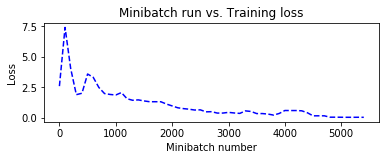

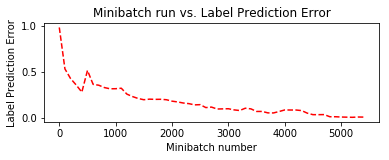

In [25]:
# Compute the moving average loss to smooth out the noise in SGD
plotdata["avgloss"] = moving_average(plotdata["loss"])
plotdata["avgerror"] = moving_average(plotdata["error"])

# Plot the training loss and the training error
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
plt.xlabel('Minibatch number')
plt.ylabel('Loss')
plt.title('Minibatch run vs. Training loss')

plt.show()

plt.subplot(212)
plt.plot(plotdata["batchsize"], plotdata["avgerror"], 'r--')
plt.xlabel('Minibatch number')
plt.ylabel('Label Prediction Error')
plt.title('Minibatch run vs. Label Prediction Error')
plt.show()

In [27]:
test_file = 'data/Out/test.txt'

In [28]:
# Load test data

reader_test = create_reader(test_file, False, input_dim, num_output_classes)
input_map = {
    input: reader_test.streams.features,
    label: reader_test.streams.labels
}

# Test data for trained model
test_minibatch_size = 515
num_samples = 10000
num_minibatches_to_test = num_samples / test_minibatch_size
test_result = 0.0

for i in range(int(num_minibatches_to_test)):
    
    # We are loading test data in batches specified by test_minibatch_size
    # Each data point in the minibatch is a MNIST digit image of 784 dimensions 
    # with one pixel per dimension that we will encode / decode with the 
    # trained model.
    data = reader_test.next_minibatch(test_minibatch_size, input_map= input_map)
    eval_error = trainer.test_minibatch(data)
    test_result = test_result + eval_error

# Average of evaluation errors of all test minibatches
print("Average test error: {0:.2f}%".format(test_result*100 / num_minibatches_to_test))

RuntimeError: Malformed input file. Bailing out.

[CALL STACK]
    > Microsoft::MSR::CNTK::IDataReader::  InitProposals
    - Microsoft::MSR::CNTK::IDataReader::  InitProposals (x4)
    - CreateCompositeDataReader (x3)
    - CNTK::TrainingParameterSchedule<double>::  GetMinibatchSize (x5)
    - Microsoft::MSR::CNTK::IDataReader::  operator= (x2)
    - Concurrency::details::_ContextCallback::  _CallInContext



In [26]:
out = C.softmax(z)

### Create a new test.txt file to evaluate de model

In [27]:
# Save the data files into a format compatible with CNTK text reader
def savetxt(filename, data, hasLabels=True, labels=0):
    dir = os.path.dirname(filename)

    if not os.path.exists(dir):
        os.makedirs(dir)
    
    print("Saving", filename )
    with open(filename, 'w') as f:
        print("opened....")
        labels_ohe = list(map(' '.join, np.eye(11, dtype=np.uint).astype(str))) #for one hot encoding
        index = 0
        for row in data:            
            row_str = row.astype(str)
            if hasLabels:                               
                label_str = labels_ohe[int(labels[index])]               
            
            feature_str = ' '.join(row_str)
            
            if hasLabels:
                f.write('|labels {} |features {}\n'.format(label_str, feature_str))
            else:
                f.write('|labels {} |features {}\n'.format(labels_ohe[1], feature_str))

            
            index = index + 1

In [28]:
print ('Writing train text file...')

data_dir = os.path.join(os.getcwd(), "data/Out")


savetxt(os.path.join(data_dir, "test_eval.txt"), data_test, False)


print("Done")

Writing train text file...
Saving C:\Users\A702628\OneDrive - Atos\Microsoft Capstone IA\data/Out\test_eval.txt
opened....
Done


In [29]:
# Read the data for evaluation
test_file = 'data/Out/test_eval.txt'
reader_eval = create_reader(test_file, False, input_dim, num_output_classes)

eval_minibatch_size = 659
eval_input_map = {label: reader_eval.streams.labels,
                  input: reader_eval.streams.features} 

data = reader_eval.next_minibatch(eval_minibatch_size, input_map = eval_input_map)

img_label = data[label].asarray()
img_data = data[input].asarray()
predicted_label_prob = [out.eval(img_data[i]) for i in range(len(img_data))]

In [30]:
# Find the index with the maximum value for both predicted as well as the ground truth
pred = [np.argmax(predicted_label_prob[i]) for i in range(len(predicted_label_prob))]
gtlabel = [np.argmax(img_label[i]) for i in range(len(img_label))]

In [31]:
print("Label    :", gtlabel[:25])
print("Predicted:", pred)

Label    : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Predicted: [8, 1, 2, 8, 2, 5, 8, 3, 2, 0, 8, 5, 5, 2, 1, 7, 5, 2, 5, 7, 1, 8, 4, 3, 3, 0, 7, 1, 0, 7, 7, 7, 10, 0, 3, 8, 2, 1, 8, 0, 8, 4, 1, 7, 0, 3, 10, 6, 4, 7, 3, 10, 4, 1, 2, 3, 1, 6, 3, 10, 7, 1, 5, 7, 8, 2, 2, 3, 0, 8, 7, 2, 3, 5, 0, 3, 10, 2, 4, 0, 0, 8, 8, 5, 2, 0, 5, 1, 5, 5, 1, 3, 3, 0, 6, 5, 1, 7, 1, 1, 0, 8, 3, 9, 1, 8, 3, 0, 1, 2, 1, 2, 5, 2, 0, 3, 1, 2, 2, 3, 5, 9, 0, 5, 3, 10, 8, 8, 2, 1, 2, 0, 8, 2, 3, 0, 8, 3, 1, 3, 2, 2, 1, 1, 1, 2, 4, 3, 2, 0, 2, 4, 0, 8, 7, 5, 2, 7, 8, 8, 1, 4, 1, 0, 0, 2, 2, 10, 1, 3, 3, 2, 5, 3, 1, 1, 10, 8, 0, 5, 3, 8, 6, 0, 0, 8, 5, 0, 0, 0, 7, 1, 8, 2, 1, 0, 8, 7, 0, 1, 0, 8, 5, 8, 1, 8, 8, 8, 5, 8, 0, 9, 7, 5, 0, 5, 2, 9, 9, 5, 3, 2, 1, 5, 0, 8, 3, 0, 9, 7, 4, 7, 3, 8, 5, 3, 7, 3, 1, 3, 6, 0, 5, 10, 10, 10, 0, 5, 2, 5, 9, 0, 10, 2, 3, 0, 0, 3, 2, 8, 0, 5, 0, 0, 3, 7, 10, 8, 0, 7, 5, 0, 0, 5, 1, 1, 7, 1, 1, 7, 7, 4, 10, 8, 2, 7, 2, 0, 2, 5, 8, 1, 1, 7, 3, 1,

In [32]:
# SAVE PREDICTIONS

import pandas as pd
id_labels = pd.read_csv('test_labels.csv')
predictions = pd.DataFrame(data = pred, columns = ['appliance'])
predictions['id'] = id_labels['names']
predictions = predictions[['id', 'appliance']]


#SAVE CSV
predictions.to_csv('Caps_Preds.csv', index = None)
#try_ = pd.read_csv('Caps_Preds.csv')